# Logistic Regression


Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.


If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation:

\\[Z = \beta_0 + \beta_1X_1\\]

Here, the coefficients β0 and β1 are the parameters of the model.


If there are multiple explanatory variables, then the above equation can be extended to


\\[Z = \beta_0 + \beta_1X_1 + \beta_1X_2 + ... + \beta_nX_n\\]

Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by Z.

## **Sigmoid Function**

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

## Sigmoid Function

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

## **Decision boundary**

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0 

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## **Making predictions**

Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.


## Assumptions of Logistic Regression

The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("dataset/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
# 1 for Male - 0 for Female
df['Gender'].replace(to_replace=['Male','Female'], value=[1,0],inplace=True)
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
# Now shuffle the dataframe
df = df.sample(frac=1)
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
105,15801658,1,21,72000,0
234,15619407,0,38,112000,0
338,15810800,0,38,55000,0
221,15663161,1,35,91000,1
261,15680587,1,36,144000,1


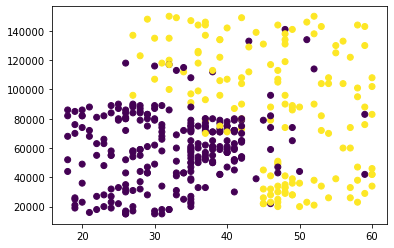

In [7]:
plt.scatter(x=df['Age'],y=df['EstimatedSalary'],c=df['Purchased'])

In [8]:
#Normalize the data
sc=MinMaxScaler()
df_n=sc.fit_transform(df[['Gender','Age','EstimatedSalary']])
X_train,X_test,y_train,y_test = train_test_split(df_n,df['Purchased'])

In [9]:
#Cost Function
def cost_function(X, Y, theta):                 
    z = X @ theta
    predict_1 = (-Y * np.log(sigmoid(z)))
    predict_0 = (1 - Y) * np.log(1 - sigmoid(z))
    return sum(predict_1 - predict_0)/len(Y)

# Logistic Function
def sigmoid(x):
    return (1)/(1+np.exp(-x))

# Time to Learn
def learn(X,Y,alpha=1,epoch=1000):
    X = np.column_stack(([1]*X.shape[0],X))
    theta = np.zeros((X.shape[1]))
    ll=[]
    for e in range(epoch):
        hx = sigmoid((X @ theta))
        theta -= alpha*(X.T @ (hx-Y))/len(X)
        ll.append(cost_function(X,Y,theta))
    return ll,theta

# Time to predict
def predict(X,theta):
    X = np.column_stack(([1]*X.shape[0],X))
    return [(1 if i>0.5 else 0) for i in sigmoid((X@theta))]

In [10]:
ll,theta = learn(X_train,y_train)
y_predict = predict(X_test,theta)
print("accuracy_score::",accuracy_score(y_test,y_predict))

accuracy_score:: 0.88


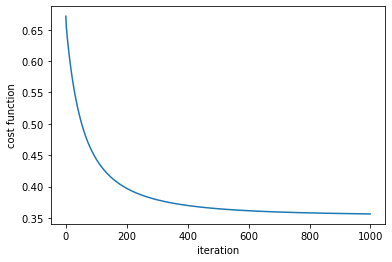

In [11]:
# cost function minimized
plt.plot(range(len(ll)),ll)
plt.xlabel("iteration")
plt.ylabel("cost function")
plt.show()

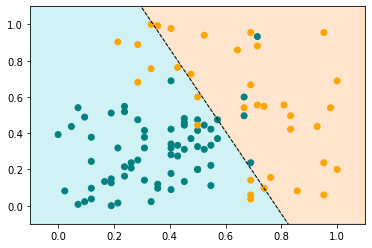

In [12]:
b = theta[0]
w1, w2 = theta[2],theta[3]

c = -b/w2
m=-w1/w2

xmin, xmax = -0.1, 1.1
ymin, ymax = -0.1,1.1
xd = np.array([xmin, xmax])
yd = m*xd + c

y_test_color = ['orange' if i==1 else 'teal' for i in y_test]
    

plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:cyan', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.scatter(x=X_test.T[1],y=X_test.T[2],c=y_test_color)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()